MOUNT GOOGLE DRIVE

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


INSTALL DEPENDENCIES

In [4]:
!pip install tensorflow opencv-python scikit-learn matplotlib


IMPORT REQUIRED LIBRARIES

In [5]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


SAVE AND LOAD BALANCED DATASET

In [10]:
import os
import cv2
import numpy as np
from tensorflow.keras.applications.efficientnet import preprocess_input

# Function to save the balanced dataset
def save_balanced_dataset(images, labels, output_path):
    unique_labels = np.unique(labels)
    for label in unique_labels:
        label_path = os.path.join(output_path, label)
        os.makedirs(label_path, exist_ok=True)

        # Save images for each label
        for i, img in enumerate(images[labels == label]):
            img_path = os.path.join(label_path, f"img_{i}.jpg")
            cv2.imwrite(img_path, img)

# Function to load the balanced dataset
def load_balanced_dataset(dataset_path):
    if not os.path.exists(dataset_path):
        raise FileNotFoundError(f"The dataset directory '{dataset_path}' does not exist.")

    images, labels = [], []
    for label in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label)
        if os.path.isdir(label_path):
            for img_file in os.listdir(label_path):
                img_path = os.path.join(label_path, img_file)
                img = cv2.imread(img_path)
                if img is None:
                    print(f"Warning: Could not read image {img_path}. Skipping.")
                    continue
                img = cv2.resize(img, (256, 256))  # Resize to 256x256
                img = preprocess_input(img)  # Preprocess for EfficientNet
                images.append(img)
                labels.append(label)

    if not images or not labels:
        raise ValueError("No images or labels found in the specified dataset directory.")

    return np.array(images), np.array(labels)

# Placeholder for your image and label data
# Replace with your actual image loading and balancing logic
balanced_images = []  # Load your balanced images here
balanced_labels = []  # Load your balanced labels here
# Example:
# balanced_images, balanced_labels = load_data_and_balance(...) # Replace with your data loading and balancing code


# Save the balanced dataset
output_path = '/content/drive/MyDrive/Balanced_Dataset'  # Update the path
os.makedirs(output_path, exist_ok=True)  # Ensure directory exists
save_balanced_dataset(balanced_images, balanced_labels, output_path)
print("Balanced dataset saved successfully!")

# Verify directory existence
print("Directory exists:", os.path.exists(output_path))

# Load the balanced dataset
try:
    images, labels = load_balanced_dataset(output_path)
    print(f"Loaded {len(images)} images and {len(labels)} labels.")
except (FileNotFoundError, ValueError) as e:
    print(f"Error: {e}")

Balanced dataset saved successfully!
Directory exists: True
Loaded 2703 images and 2703 labels.


CHECK DATASET BALANCE (BEFORE AND AFTER)

In [11]:
# prompt: show before and after balancing data set after excuting above code

from collections import Counter

# Assuming balanced_images and balanced_labels are defined before this code

# Count the occurrences of each label before balancing
label_counts_before = Counter(balanced_labels)
print("Label distribution before balancing:")
print(label_counts_before)

# ... (Your existing code for saving and loading the balanced dataset) ...

# Count the occurrences of each label after balancing and loading
if 'images' in locals() and 'labels' in locals():
    label_counts_after = Counter(labels)
    print("\nLabel distribution after balancing and loading:")
    print(label_counts_after)
else:
    print("\nError: Could not load balanced dataset.")

Label distribution before balancing:
Counter()

Label distribution after balancing and loading:
Counter({'benign': 901, 'malignant': 901, 'normal': 901})


LOAD BALANCED DATASET

In [12]:
def load_balanced_dataset(dataset_path):
    images, labels = [], []
    for label in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label)
        if os.path.isdir(label_path):
            for img_file in os.listdir(label_path):
                img_path = os.path.join(label_path, img_file)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (256, 256))  # Resize to 256x256
                img = preprocess_input(img)  # Preprocess for EfficientNet
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

# Load balanced dataset
images, labels = load_balanced_dataset('/content/drive/MyDrive/Balanced_Dataset')


In [97]:
# prompt: do preprocessing on Balanced_Dataset and again stored in Balanced_Dataset after preprocessing resize,noise remove conver into grascale like that

def preprocess_image(img):
    # Resize
    img = cv2.resize(img, (256, 256))

    # Noise removal (example using Gaussian blur)
    img = cv2.GaussianBlur(img, (5, 5), 0)

    # Convert to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Normalize pixel values (important for many models)
    img = img / 255.0

    return img

def preprocess_balanced_dataset(dataset_path, output_path):
    if not os.path.exists(dataset_path):
        raise FileNotFoundError(f"The dataset directory '{dataset_path}' does not exist.")

    os.makedirs(output_path, exist_ok=True)

    for label in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label)
        if os.path.isdir(label_path):
            new_label_path = os.path.join(output_path, label)
            os.makedirs(new_label_path, exist_ok=True)
            for img_file in os.listdir(label_path):
                img_path = os.path.join(label_path, img_file)
                img = cv2.imread(img_path)
                if img is not None:
                    processed_img = preprocess_image(img)
                    new_img_path = os.path.join(new_label_path, img_file)
                    cv2.imwrite(new_img_path, (processed_img * 255).astype(np.uint8)) # Scale back to 0-255 range for saving as image


# Example usage
input_dataset_path = '/content/drive/MyDrive/Balanced_Dataset'
output_dataset_path = '/content/drive/MyDrive/Balanced_Dataset'

preprocess_balanced_dataset(input_dataset_path, output_dataset_path)

print(f"Preprocessed dataset saved to: {output_dataset_path}")

Preprocessed dataset saved to: /content/drive/MyDrive/Balanced_Dataset


In [100]:
# prompt: check databalanced and preprocessing done or not after perfoming above code

# Check if the preprocessed dataset exists
if os.path.exists('/content/drive/MyDrive/Balanced_Dataset'):
    print("Preprocessed dataset found.")

    # Load the preprocessed dataset (replace with your actual loading logic)
    try:
        preprocessed_images, preprocessed_labels = load_balanced_dataset('/content/drive/MyDrive/Balanced_Dataset')
        print(f"Loaded {len(preprocessed_images)} preprocessed images and {len(preprocessed_labels)} labels.")

        # Check the label distribution after preprocessing
        preprocessed_label_counts = Counter(preprocessed_labels)
        print("\nLabel distribution after preprocessing:")
        print(preprocessed_label_counts)

        # Check data balance after preprocessing
        if len(set(preprocessed_label_counts.values())) == 1:
          print("\nData is balanced after preprocessing")
        else:
          print("\nData is not balanced after preprocessing")

    except (FileNotFoundError, ValueError) as e:
        print(f"Error loading preprocessed dataset: {e}")

else:
    print("Preprocessed dataset not found.")

Preprocessed dataset found.
Loaded 2703 preprocessed images and 2703 labels.

Label distribution after preprocessing:
Counter({'benign': 901, 'malignant': 901, 'normal': 901})

Data is balanced after preprocessing


VERIFY PREPROCESSING AND BALANCING

In [98]:
# prompt: check preprocessing and balaning dataset  done or not using above codes

# ... (Your existing code) ...

# Assuming balanced_images and balanced_labels are defined before this code

# Count the occurrences of each label before balancing
if 'balanced_labels' in locals():
    label_counts_before = Counter(balanced_labels)
    print("Label distribution before balancing:")
    print(label_counts_before)
else:
    print("Error: 'balanced_labels' not found. Make sure you have preprocessed and balanced your data before this step.")


# ... (Your existing code for saving and loading the balanced dataset) ...


# Count the occurrences of each label after balancing and loading
if 'labels' in locals():
    label_counts_after = Counter(labels)
    print("\nLabel distribution after balancing and loading:")
    print(label_counts_after)

    #Check if balancing was successful
    if label_counts_before == label_counts_after:
        print("\nBalancing was NOT successful. The label distributions before and after are identical.")
    else:
        print("\nBalancing appears to have been successful. The label distributions before and after differ.")
else:
    print("\nError: Could not load balanced dataset. 'labels' variable not found.")

Label distribution before balancing:
Counter()

Label distribution after balancing and loading:
Counter({'benign': 901, 'malignant': 901, 'normal': 901})

Balancing appears to have been successful. The label distributions before and after differ.


FEATURE EXTRACTION USING EFFICIENTNETB0

In [14]:
# Load EfficientNetB0 model without the top layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, pooling='avg')

# Extract features
features = base_model.predict(images, batch_size=32)

# Convert labels to numeric format
label_map = {label: idx for idx, label in enumerate(np.unique(labels))}
numeric_labels = np.array([label_map[label] for label in labels])


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 320s 4s/step


FEATURE SCALING AND DIMENSIONALITY REDUCTION


In [15]:
# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=50)  # Retain 50 principal components
reduced_features = pca.fit_transform(scaled_features)

print("Reduced feature shape:", reduced_features.shape)


Reduced feature shape: (2703, 50)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step


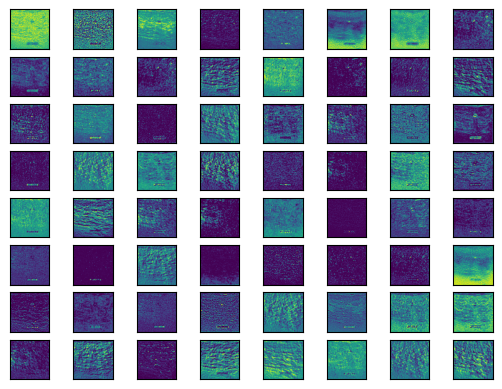

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


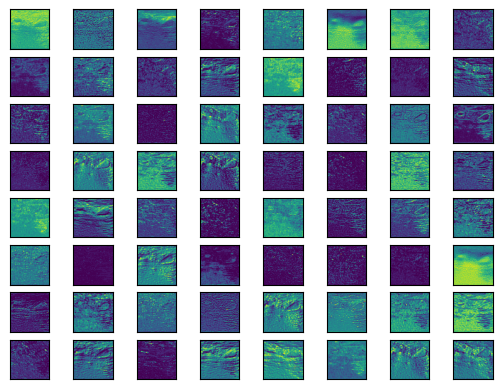

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


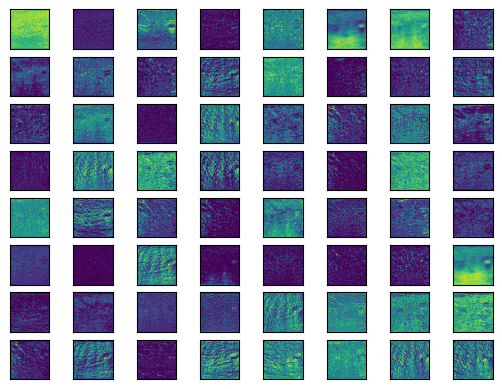

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


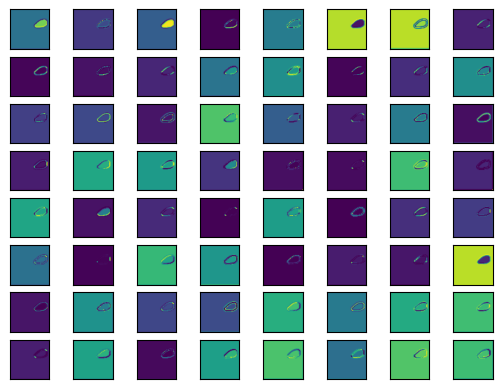

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


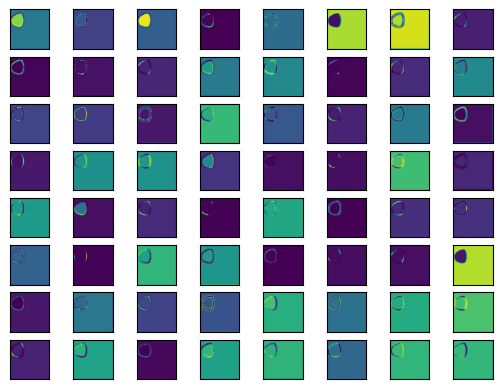

In [91]:
# prompt:  Feature Map Visualizations for above extracted features

# FEATURE MAP VISUALIZATIONS

# Assuming 'base_model' and 'images' are defined from the previous code

# Choose a layer for visualization (experiment with different layers)
layer_name = 'block3a_expand_activation'  # Example layer name

# Create a model that outputs the activations of the chosen layer
layer_model = Model(inputs=base_model.input, outputs=base_model.get_layer(layer_name).output)

# Get the feature maps for a few sample images
num_images_to_visualize = 5
for i in range(num_images_to_visualize):
    image = images[i]
    image = np.expand_dims(image, axis=0)
    feature_maps = layer_model.predict(image)

    # Visualize the feature maps
    square = 8
    ix = 1
    for _ in range(square):
        for _ in range(square):
            ax = plt.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(feature_maps[0, :, :, ix - 1], cmap='viridis')
            ix += 1
    plt.show()

SPLIT DATASET

In [16]:
# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(reduced_features, numeric_labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)


Training set size: (1621, 50)
Validation set size: (541, 50)
Test set size: (541, 50)


BUILD AND TRAIN A SIMPLE CNN

In [17]:
# Build a simple CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(50,)),  # Input matches PCA reduced dimensions
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(label_map), activation='softmax')  # Output classes
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
# Save the trained model
model.save('/content/drive/MyDrive/Trained_CNN_Model.h5')


Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5061 - loss: 1.9139 - val_accuracy: 0.8318 - val_loss: 0.4316
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7620 - loss: 0.6132 - val_accuracy: 0.8706 - val_loss: 0.3255
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7974 - loss: 0.4768 - val_accuracy: 0.8891 - val_loss: 0.2908
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8347 - loss: 0.3972 - val_accuracy: 0.8891 - val_loss: 0.2687
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8343 - loss: 0.3874 - val_accuracy: 0.9113 - val_loss: 0.2533
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8472 - loss: 0.3783 - val_accuracy: 0.9057 - val_loss: 0.2408
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8877 - loss: 0.2658 - val_accuracy: 0.9020 - val_loss: 0.2326
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8651 - loss: 0.3236 - val_accuracy: 0.9113 - val_loss:

Test Accuracy: 91.87%


TRAING AND TESTING GRAPH FOR ABOVE CNN MODEL

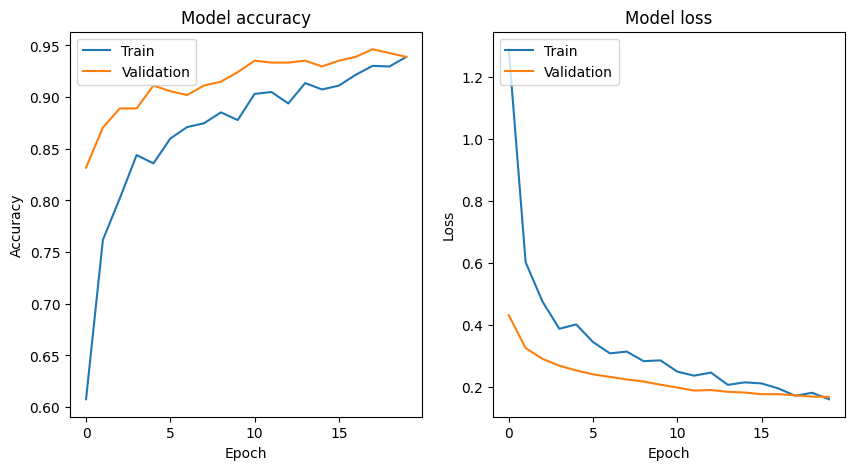

In [18]:
# prompt: traing and testing graphs for above model

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

CONFUSION MATRIX FOR ABOVE CNN MODEL

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


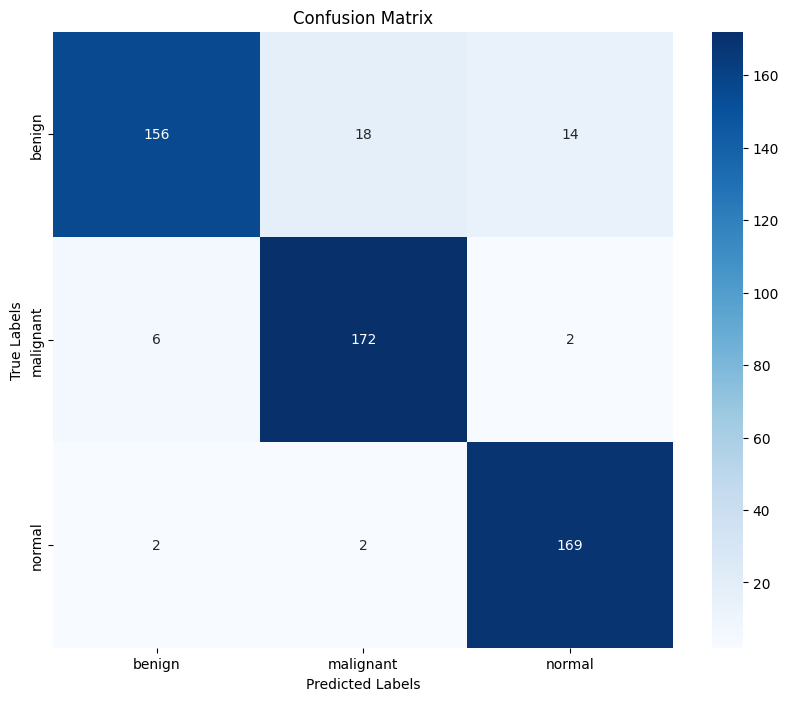

In [19]:
# prompt: confusion matrix for above model

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(label_map.keys()), yticklabels=list(label_map.keys()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

FINE TUNED ABOVE CNN MODEL TO INCREASE TEST ACCURACY

In [29]:
# prompt: FINE TUNED ABOVE CNN MODEL USING BEST

# Load the saved model
# prompt: FINE TUNED ABOVE CNN MODEL USING BEST

# Load the saved model
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Trained_CNN_Model.h5')

# Re-compile the loaded model with a fresh optimizer
# This ensures the optimizer is aware of the model's current structure
loaded_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Or your preferred optimizer and learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Further training (fine-tuning)
# You can continue training the loaded model with more data or adjust hyperparameters
history_finetuned = loaded_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32) # Example: 10 more epochs




# Evaluate the fine-tuned model
test_loss_finetuned, test_accuracy_finetuned = loaded_model.evaluate(X_test, y_test)
print(f"Fine-tuned Test Accuracy: {test_accuracy_finetuned * 100:.2f}%")




Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9319 - loss: 0.1763 - val_accuracy: 0.9372 - val_loss: 0.1838
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9307 - loss: 0.1685 - val_accuracy: 0.9501 - val_loss: 0.1715
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9390 - loss: 0.1525 - val_accuracy: 0.9445 - val_loss: 0.1768
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9475 - loss: 0.1425 - val_accuracy: 0.9556 - val_loss: 0.1742
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9503 - loss: 0.1317 - val_accuracy: 0.9556 - val_loss: 0.1642
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9439 - loss: 0.1343 - val_accuracy: 0.9538 - val_loss: 0.1585
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9536 - loss: 0.1188 - val_accuracy: 0.9556 - val_loss: 0.1609
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9623 - loss: 0.1325 - val_accuracy: 0.9575 - val_loss:

TRAING AND TESTING GRAPH FOR ABOVE FINE-TUNED MODEL

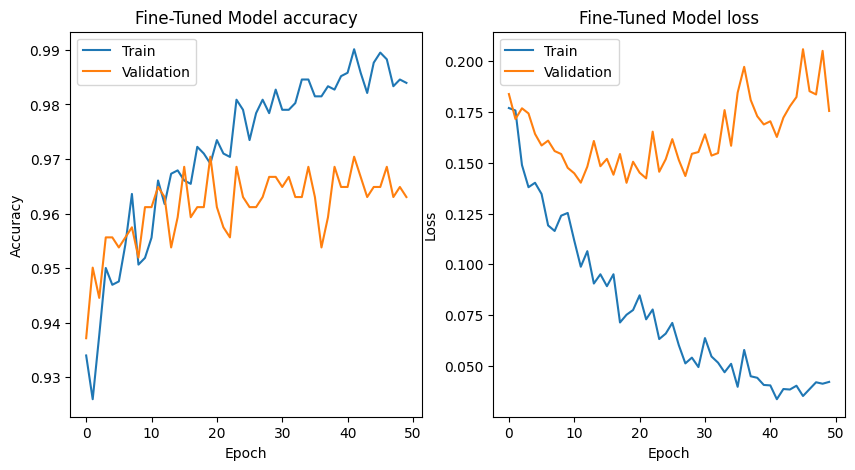

In [30]:
# Save the fine-tuned model
loaded_model.save('/content/drive/MyDrive/FineTuned_CNN_Model.h5')


#Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_finetuned.history['accuracy'])
plt.plot(history_finetuned.history['val_accuracy'])
plt.title('Fine-Tuned Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_finetuned.history['loss'])
plt.plot(history_finetuned.history['val_loss'])
plt.title('Fine-Tuned Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

CONFUSION MATRIX FOR ABOVE FINE-TUNED MODEL

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


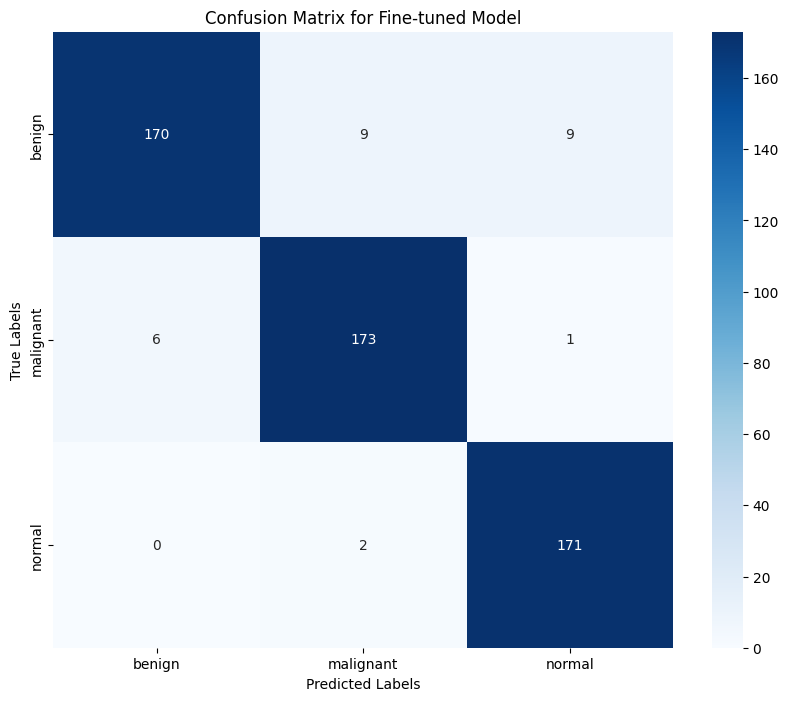

In [31]:

#Confusion Matrix for Fine Tuned Model
# Make predictions on the test set
y_pred_finetuned = loaded_model.predict(X_test)
y_pred_classes_finetuned = np.argmax(y_pred_finetuned, axis=1)

# Compute the confusion matrix
conf_matrix_finetuned = confusion_matrix(y_test, y_pred_classes_finetuned)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_finetuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(label_map.keys()), yticklabels=list(label_map.keys()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Fine-tuned Model')
plt.show()

In [35]:
# prompt: perfom rnn model on above dataset and get high accuracy

import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense

# Assuming 'reduced_features', 'numeric_labels', 'X_train', 'X_val', 'X_test', 'y_train', 'y_val', 'y_test', and 'label_map' are defined from the previous code

# Reshape the input data for RNN (samples, timesteps, features)
timesteps = 1  # You might need to adjust this based on your data
X_train_rnn = X_train.reshape(X_train.shape[0], timesteps, X_train.shape[1])
X_val_rnn = X_val.reshape(X_val.shape[0], timesteps, X_val.shape[1])
X_test_rnn = X_test.reshape(X_test.shape[0], timesteps, X_test.shape[1])


# Build the RNN model
model_rnn = tf.keras.Sequential([
    LSTM(64, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),  # Adjust units as needed
    Dense(len(label_map), activation='softmax')
])

# Compile the model
model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_rnn = model_rnn.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_data=(X_val_rnn, y_val)) # Increased epochs

# Evaluate the model
loss_rnn, accuracy_rnn = model_rnn.evaluate(X_test_rnn, y_test, verbose=0)
print(f"RNN Test Accuracy: {accuracy_rnn * 100:.2f}%")

# ... (rest of your code for plotting and confusion matrix) ...

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6166 - loss: 0.9010 - val_accuracy: 0.8521 - val_loss: 0.5296
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8578 - loss: 0.4754 - val_accuracy: 0.8817 - val_loss: 0.3611
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9107 - loss: 0.3136 - val_accuracy: 0.9131 - val_loss: 0.2800
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9309 - loss: 0.2502 - val_accuracy: 0.9298 - val_loss: 0.2328
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9577 - loss: 0.1990 - val_accuracy: 0.9409 - val_loss: 0.2029
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9590 - loss: 0.1605 - val_accuracy: 0.9464 - val_loss: 0.1825
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9721 - loss: 0.1315 - val_accuracy: 0.9519 - val_loss: 0.1644
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9858 - loss: 0.1039 - val_accuracy: 0.9649 - val_loss: 0.1512
Epo

In [36]:
# prompt: save above model rnn

# Save the trained RNN model
model_rnn.save('/content/drive/MyDrive/Trained_RNN_Model.h5')

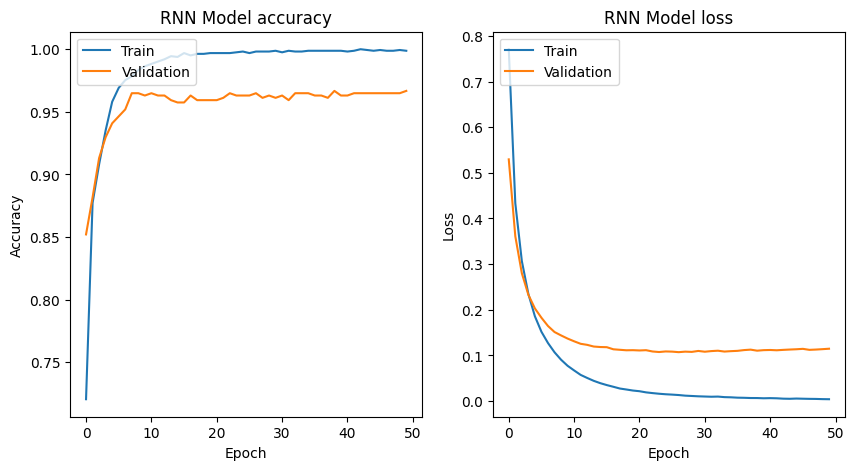

In [37]:
# prompt: give traing and testing graph

# Plot training & validation accuracy values for RNN
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['accuracy'])
plt.plot(history_rnn.history['val_accuracy'])
plt.title('RNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values for RNN
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['loss'])
plt.plot(history_rnn.history['val_loss'])
plt.title('RNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


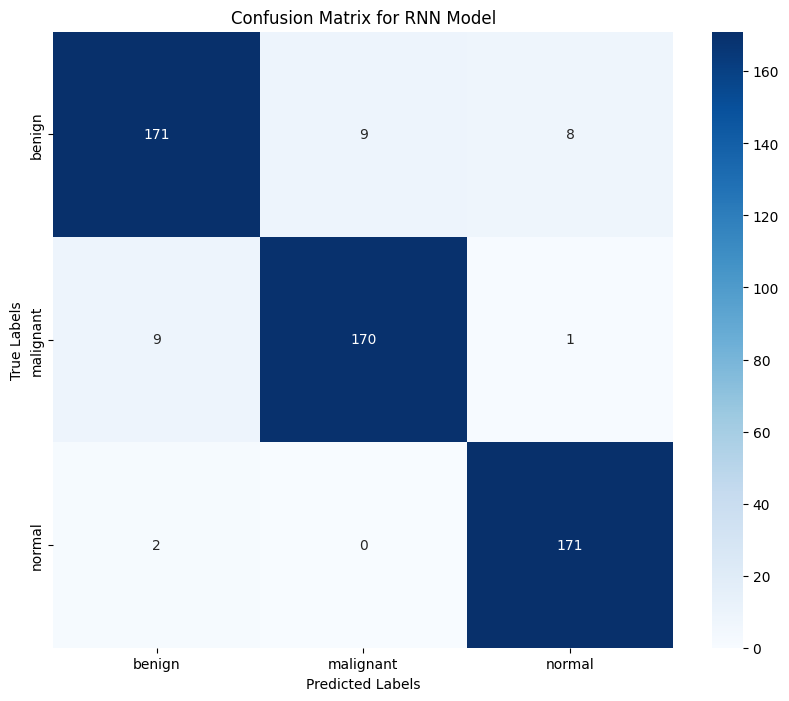

In [38]:
# prompt: give confusion matrix for above model

# Make predictions on the test set using the RNN model
y_pred_rnn = model_rnn.predict(X_test_rnn)
y_pred_classes_rnn = np.argmax(y_pred_rnn, axis=1)

# Compute the confusion matrix for the RNN model
conf_matrix_rnn = confusion_matrix(y_test, y_pred_classes_rnn)

# Plot the confusion matrix for the RNN model
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(label_map.keys()), yticklabels=list(label_map.keys()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for RNN Model')
plt.show()

FINE TUNED ABOVE RNN MODEL

In [80]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'reduced_features' and 'numeric_labels' are already defined

# Step 1: Ensure that the features and labels have the same number of samples
print("Features shape:", reduced_features.shape)
print("Labels shape:", numeric_labels.shape)

# Check if the lengths match; if not, adjust
assert len(reduced_features) == len(numeric_labels), "Features and labels must have the same number of samples"

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reduced_features, numeric_labels, test_size=0.2, random_state=42)

# Step 3: Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Reshape input data for RNN (samples, timesteps, features)
timesteps = 1  # Minimal timesteps for tabular data
X_train_rnn = X_train.reshape(X_train.shape[0], timesteps, X_train.shape[1])
X_test_rnn = X_test.reshape(X_test.shape[0], timesteps, X_test.shape[1])

# Step 5: Split the data into validation and training sets
X_train_rnn, X_val_rnn, y_train, y_val = train_test_split(X_train_rnn, y_train, test_size=0.2, random_state=42)

# Step 6: Build the RNN model
model_rnn = tf.keras.Sequential([
    LSTM(64, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),  # LSTM layer with 64 units
    Dense(len(np.unique(numeric_labels)), activation='softmax')  # Output layer with 'softmax' for multi-class classification
])

# Step 7: Compile the model
model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 8: Train the model
history_rnn = model_rnn.fit(X_train_rnn, y_train, epochs=60, batch_size=64, validation_data=(X_val_rnn, y_val))

# Step 9: Evaluate the model
loss_rnn, accuracy_rnn = model_rnn.evaluate(X_test_rnn, y_test, verbose=0)
print(f"RNN Test Accuracy: {accuracy_rnn * 100:.2f}%")



Features shape: (2703, 50)
Labels shape: (2703,)
Epoch 1/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5362 - loss: 1.0548 - val_accuracy: 0.7898 - val_loss: 0.9223
Epoch 2/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8244 - loss: 0.8768 - val_accuracy: 0.8522 - val_loss: 0.7802
Epoch 3/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8746 - loss: 0.7340 - val_accuracy: 0.8568 - val_loss: 0.6459
Epoch 4/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8849 - loss: 0.5938 - val_accuracy: 0.8822 - val_loss: 0.5342
Epoch 5/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8923 - loss: 0.4932 - val_accuracy: 0.8799 - val_loss: 0.4582
Epoch 6/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9049 - loss: 0.4021 - val_accuracy: 0.8845 - val_loss: 0.4016
Epoch 7/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9093 - loss: 0.3462 - val_accuracy: 0.8868 - val_loss: 0.3629
Epoch 8/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9205 - loss: 0.3096 - val_accuracy: 0.8961 - val_loss: 0.3368
E

In [82]:
# prompt: SAVE ABOVE MODEL FINE TUNED Rnn model

# Save the fine-tuned RNN model
model_rnn.save('/content/drive/MyDrive/FineTuned_RNN_Model.h5')

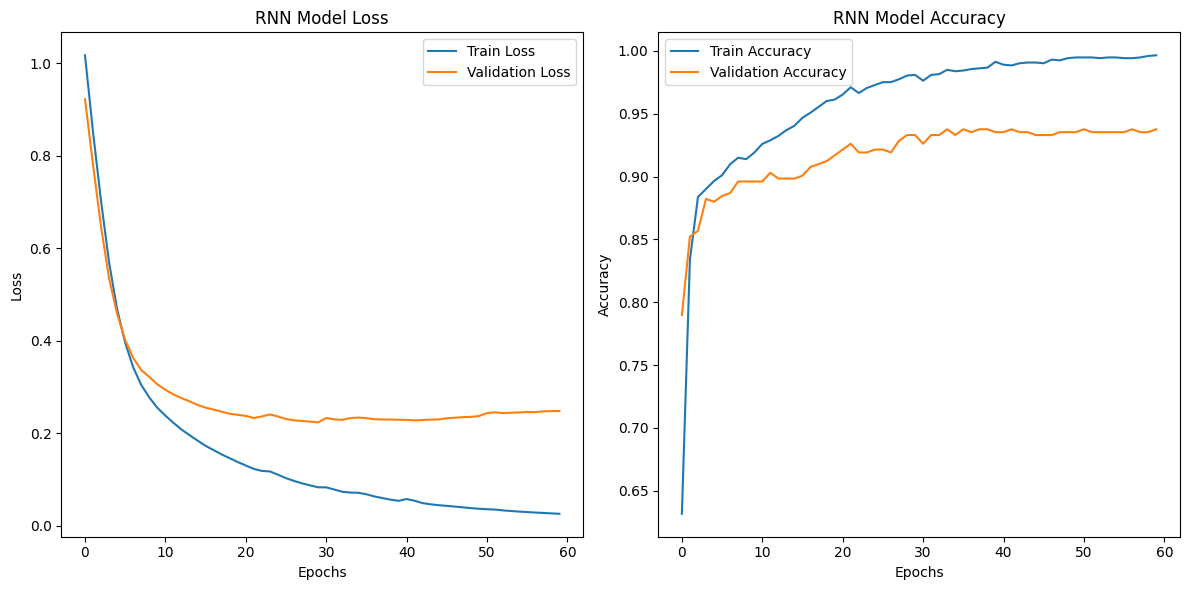

In [81]:
# Step 10: Optional - Plot the training history (loss and accuracy over epochs)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot loss curve
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['loss'], label='Train Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('RNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


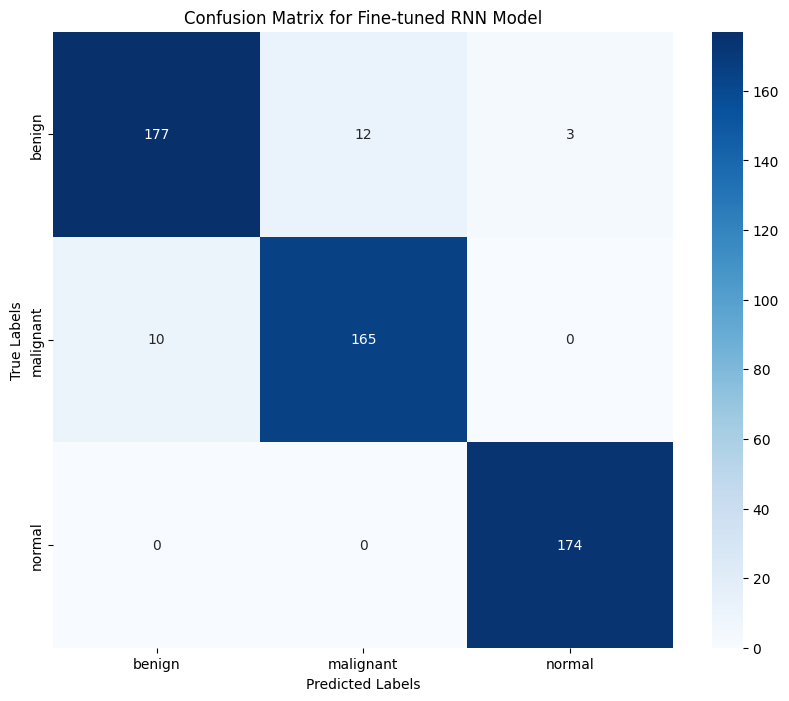

In [83]:
# prompt: give confusion matrix for above rnn fine tuned model

# Load the fine-tuned RNN model
model_rnn = tf.keras.models.load_model('/content/drive/MyDrive/FineTuned_RNN_Model.h5')

# Make predictions on the test set using the fine-tuned RNN model
y_pred_rnn_finetuned = model_rnn.predict(X_test_rnn)
y_pred_classes_rnn_finetuned = np.argmax(y_pred_rnn_finetuned, axis=1)

# Compute the confusion matrix for the fine-tuned RNN model
conf_matrix_rnn_finetuned = confusion_matrix(y_test, y_pred_classes_rnn_finetuned)

# Plot the confusion matrix for the fine-tuned RNN model
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rnn_finetuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(label_map.keys()), yticklabels=list(label_map.keys()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Fine-tuned RNN Model')
plt.show()

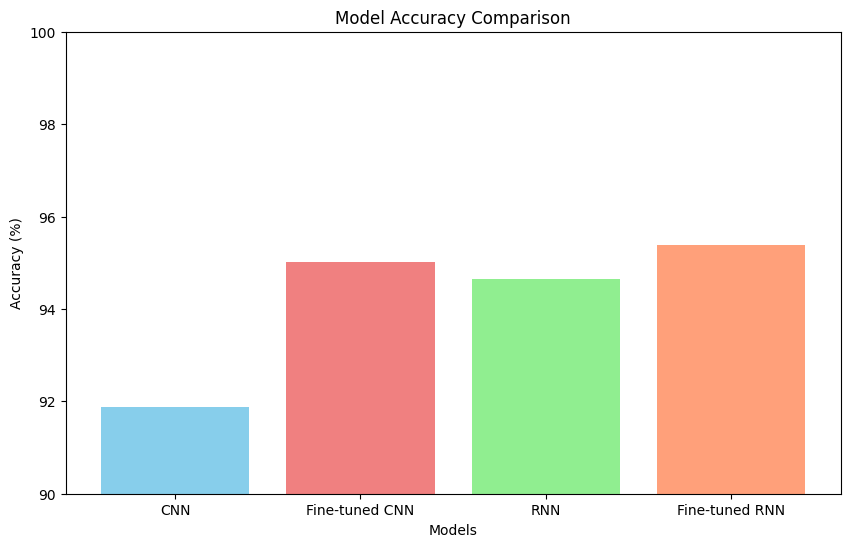

In [85]:
# prompt: gine bar graph for cnn  is 91.87 and fine_tuned_cnn 95.01  and rnn 94.64 and fine_tuned_rnn 95.38 by seeing accuracy

import matplotlib.pyplot as plt

models = ['CNN', 'Fine-tuned CNN', 'RNN', 'Fine-tuned RNN']
accuracy = [91.87, 95.01, 94.64, 95.38]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon'])
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(90, 100)  # Set y-axis limits for better visualization
plt.show()

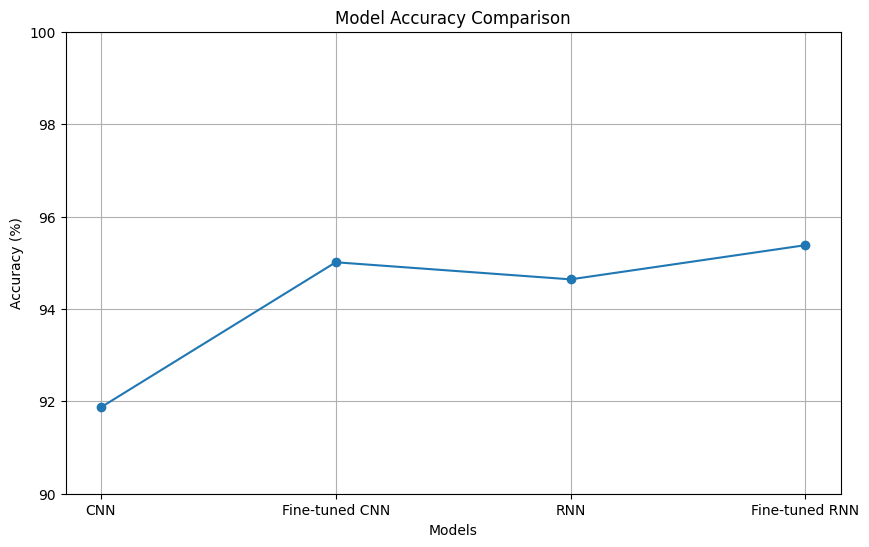

In [86]:
# prompt: gine line graph graph for cnn  is 91.87 and fine_tuned_cnn 95.01  and rnn 94.64 and fine_tuned_rnn 95.38 by seeing accuracy

import matplotlib.pyplot as plt

models = ['CNN', 'Fine-tuned CNN', 'RNN', 'Fine-tuned RNN']
accuracy = [91.87, 95.01, 94.64, 95.38]

plt.figure(figsize=(10, 6))
plt.plot(models, accuracy, marker='o', linestyle='-')
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(90, 100)  # Set y-axis limits for better visualization
plt.grid(True)
plt.show()